<a href="https://colab.research.google.com/github/WONYOUNG-SONG/DeepLearningTensorFlow2/blob/main/Lab11_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab11: MNIST with CNN**

# **What is CNN?**

**A Convolutional Neural Network (CNN) is a Deep Learning algorithm that can take in an input image, assign importance to various aspects/objects in the image, and be able to differentiate one from the other.**

**CNN consists of multiple layers like the input layer, Convolutional layer, Pooling layer, and fully connected layers.**


<div>
  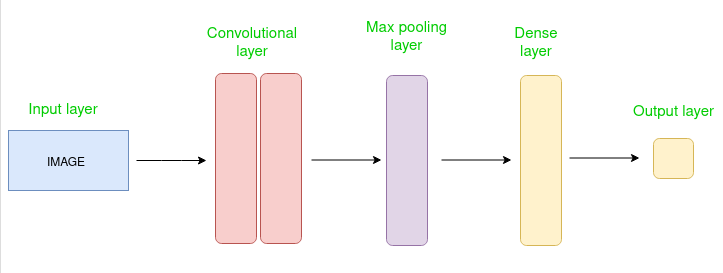
</div>

**The convolutional layer is the first layer of a convolutional network and can be followed by additional convolutional layers or pooling layers.**

**With each layer, the CNN increases in its complexity.**

<div>
  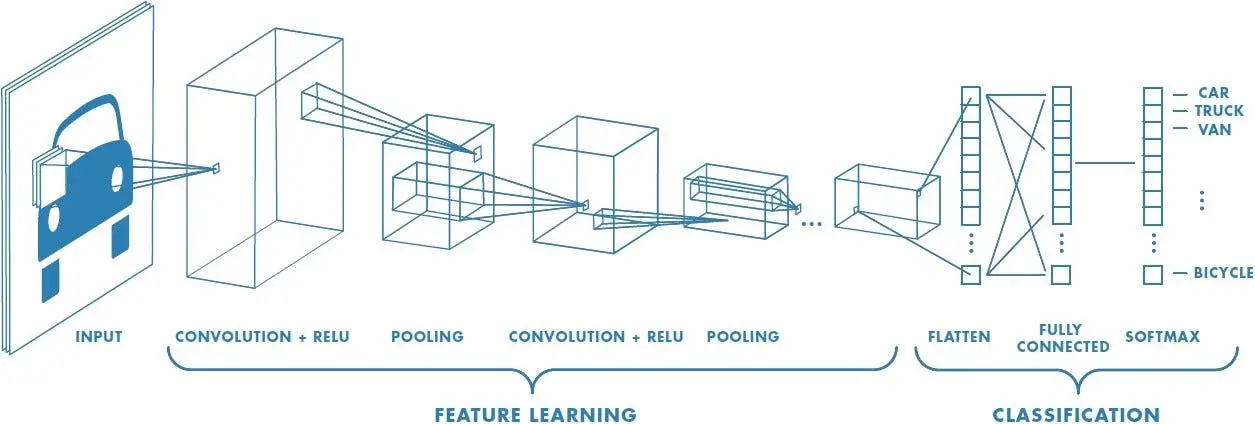
</div>

**It starts with an image (3D: width * height * depth)**

<div>
  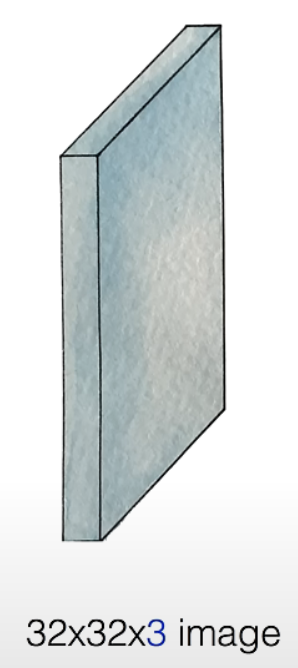
</div>

**And focus on a small area only (5 * 5 * 3)**

<div>
  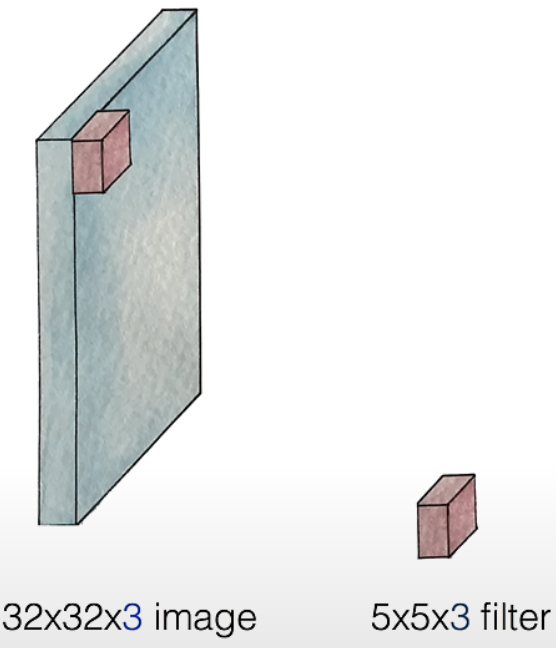
</div>

**Get one number using the filter**

**In this case, we can use activation function, like ReLU.**

**Use this approach to move through the filters and get each value for the entire image.**

<div>
  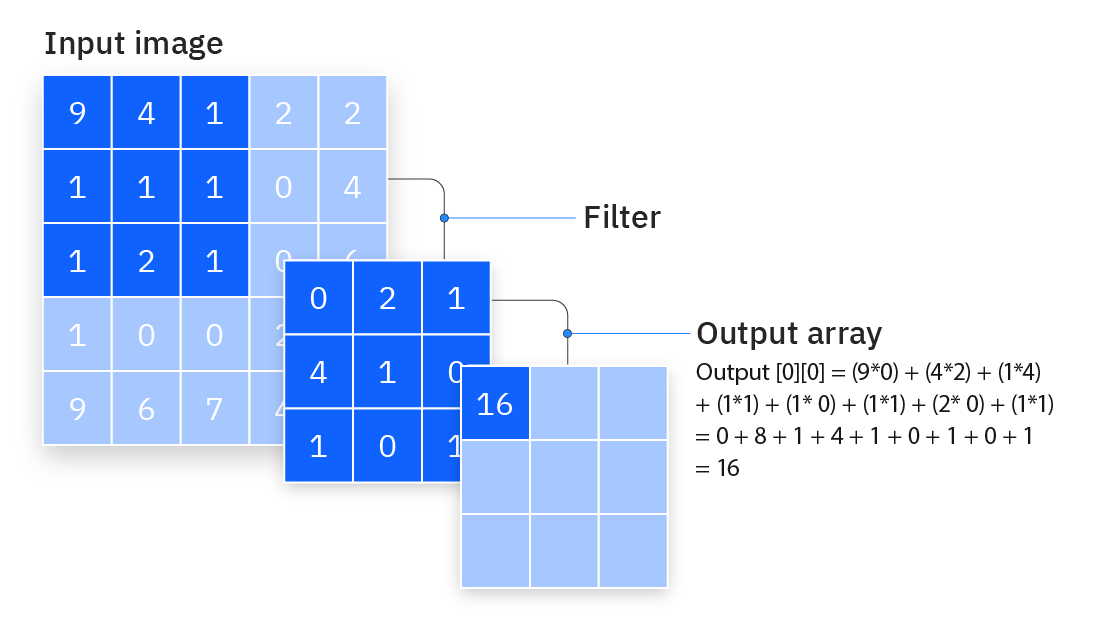
</div>

When the size of the image is N and the size of the filter is F, then output size will be:

$$
\frac{(N - F)}{stride} +1
$$

For example, the image is 7 * 7, the filter is 3 * 3, and the stride is 1, then

$$
\frac{7-3}{1} + 1=5
$$

reference: https://www.geeksforgeeks.org/introduction-convolution-neural-network/

https://www.ibm.com/topics/convolutional-neural-networks


In [ ]:
# Lab 11 MNIST and Convolutional Neural Network
import numpy as np
import tensorflow as tf
import random

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test / 255
x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# one hot encode y data
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# hyper parameters
learning_rate = 0.001
training_epochs = 12
batch_size = 128

tf.model = tf.keras.Sequential()
# L1
tf.model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L2
tf.model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
tf.model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# L3 fully connected
tf.model.add(tf.keras.layers.Flatten())
tf.model.add(tf.keras.layers.Dense(units=10, kernel_initializer='glorot_normal', activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

accuracy 98% loss 3%